# **Heart Diseases Classification**

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading the csv data to a Pandas DataFrame
df = pd.read_csv('/content/heart_disease_data.csv')

In [4]:
# 1. Summary Statistics
summary_stats = df.describe()
print(summary_stats)


              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

**Data Cleaning**

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [6]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("Duplicate Rows:", duplicates)

Duplicate Rows: 1


In [7]:
# Identify duplicate rows
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1  


In [8]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [10]:
# number of rows and columns in the dataset
df.shape

(302, 14)

In [12]:
# checking the distribution of Target Variable
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

# **Correlation Analysis**

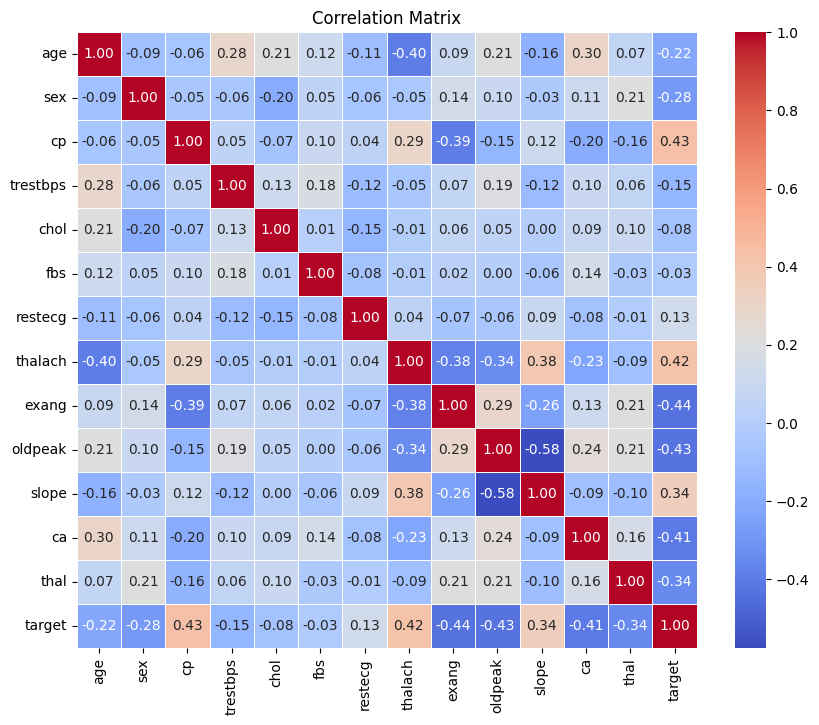

In [14]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [16]:
#Splitting the Features and Target
X = df.drop(columns='target', axis=1)
Y = df['target']

In [17]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [18]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64


In [20]:
##Splitting the Data into Training data & Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

print(X.shape, X_train.shape, X_test.shape)

(302, 13) (241, 13) (61, 13)


# **Model Building : LogisticRegression**

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Assuming 'df' is your DataFrame containing the heart disease dataset

# Define features and target variable
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target variable (presence of heart disease)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Generate classification report for detailed metrics
report = classification_report(y_test, y_test_pred)

# Print summary
print("--- Summary of Heart Disease Classification Using Logistic Regression ---")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\n--- Detailed Metrics ---")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\n--- Classification Report ---")
print(report)


--- Summary of Heart Disease Classification Using Logistic Regression ---
Training Accuracy: 0.8672
Test Accuracy: 0.8197

--- Detailed Metrics ---
Precision: 0.8387
Recall: 0.8125
F1-score: 0.8254

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



# **Summary**

Model Performance:

Training Accuracy: 85.06%
Test Accuracy: 81.97%

**Analysis:**

The logistic regression model shows good performance with an accuracy of approximately 85% on the training data and 82% on the test data.

The slight drop in accuracy from training to test data suggests that the model generalizes well but may slightly overfit the training data.

**Precision (0.8387)**:

Out of all the instances predicted as having heart disease, 83.87% actually had heart disease. It measures the accuracy of positive predictions.

**Recall (0.8125):**

Out of all the instances that actually had heart disease, the model correctly identified 81.25% of them. It measures the model's completeness or sensitivity.

**F1-score (0.8254):**

It is the harmonic mean of precision and recall, providing a single metric to evaluate the model's accuracy. An F1-score closer to 1 indicates better model performance in terms of both precision and recall.